# Heart disease diagnosis

Firstly, let's add the libraries we will need.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from statistics import mean  

Let's implement a class which reads the data, pre-processes it, visualizes, and builds a classifier and evaluates the success of methods.

In [14]:
class strokeClassifier:
    """A class used to read, process, clean data, builds classifiers and evaluates them
    
    Attributes
    ----------
    svm : SVC classifier
          Support Vector Classifier
    dt: DecisionTreeClassifier
        Decision Tree Classifier
    nb: GaussianNB
        Naive Bayes Classifier
    num_feats: Integer
               Number of features in the dataset

    Methods
    -------
    read_data(filename)
        Reads data into a dataframe
        
    split_data(df, test_ratio)
        Splits dataset into train and test using a ratio
        
    show_feature_correlation(df)
        Calculates feature correlations and shows on a heatmap
    
    normalize_features(df)
        Performs feature scaling into range of 0-1
    
    preprocess_data(df)
        drops NaNs
    
    evaluate(c_labels, p_labels)
        evaluates classifier performances using metrics (accuracy, precision, recall, F-measure)
    
    rank_features(x_train, y_train)
        ranks features based on their importance using a Decision Tree
        
    cross_validation(df, n_s)
        Performs n-fold cross validation using Support Vector Machine
    
    """

    
    def __init__(self): 
        """
        Attributes
        ----------
        svm : SVC classifier
              Support Vector Classifier
        dt: DecisionTreeClassifier
            Decision Tree Classifier
        nb: GaussianNB
            Naive Bayes Classifier
        num_feats: Integer
                Number of features in the dataset
        """
       
    
        
        self.svm = SVC(kernel = 'rbf') # initialize Support Vector Machine Classifier
        self.dt = DecisionTreeClassifier() # initialize Decision Tree Classifie
        self.nb = GaussianNB() 
        self.num_feats = 0 # initialize number of features as defauilt to 0, to be set in read_data function
    
    

    def read_data(self, filename):
        """Read the data and return as a dataframe

        Parameters
        ----------
        filename : str 
            The name of the file which contains data
            
        returns: dataframe (df)
                The data as a df which makes to process data easier

        Raises
        ------
        IOError
            If the file is not found
                
        """ 
        
        try:
            with open(filename) as fobj:
                # read the data and give the column names as listed in the data descripton
                df = pd.read_csv(filename, names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                          'restecg', 'thalach', 'exang', 'oldpeak', 
                                            'slope', 'ca', 'thal', 'label' ])
            
            # update the number of features based on the input file
            self.num_feats = len(df.columns)-1
                
        except IOError:
            raise ValueError('File is not available!')
            

        return df
    
    
    
    
    def split_data(self, df, test_ratio):
        """Split data into train and test sets  

        Parameters
        ----------
        df : dataFrame
             data: columns as feats where last column is labels
        
        test_ratio: float
              percentage of test data to be splitted
             
        returns: pd.Series, pd.Series, pd.Series, pd.Series, 
                 train features, test features, train labels and test labels
       
        """
            
        
        #use stratify to split so that same percentage of different classes fall into both train and test
        x_train, x_test, y_train, y_test = train_test_split(df_data.iloc[:,0:-1], df_data.iloc[:, -1],
                                                    test_size = test_ratio,
                                                    stratify = df_data.iloc[:, -1])
       
        
        return x_train, x_test, y_train, y_test
    
        
    def show_feature_correlation(self, df):
        """Show a correlation of features as a heatmap
        
        Parameters
        ----------
        df : dataFrame
             data columns as feats where last column is labels
                
        """
        
        corr = df.iloc[:,:-1].corr()
        
        ax = plt.axes() 
        heat_map = sb.heatmap(corr, annot = True, cmap="YlGnBu", linewidths=.7, ax = ax)
        ax.set_title('Correlation map for features')
        plt.show()
        
    
    def normalize_features(self, df):
        
        """Normalize features of df to 0-1

        Parameters
        ----------
        df : dataFrame
             data: columns as feats where last column is labels
        
        returns: dataFrame
                 normalized data
                
        """
        
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(df)
        df.iloc[:, :self.num_feats] = x_scaled[:, :self.num_feats]
        
        return df
        
    
    def show_class_distributions(self, df):
        """Calculate the occurrence of each class label and show it as a figure

        Parameters
        ----------
        df : dataFrame
             data: columns as feats where last column is labels        
        """
        
        df['label'].value_counts().sort_values().plot(kind = 'barh')
        plt.title('Class distributions')
        plt.ylabel('Class labels')
        plt.xlabel('Number of instances')
        plt.show()
    
    
    def preprocess_data(self, df):
        
        """ Check and preprocess the data
            
        Parameters
        ----------
        df : DataFrame (df)
            data: columns as feats where last column is labels

         returns: dataFrame
                 cleaned data
        """ 
        
        #data has some missing values assigned as ?, so replace them by nan
        df.replace("?", np.nan, inplace = True)
        
        
        print('Checking the percentage of NaNs for each feature...\n')
        perc = (df.isna().sum(axis = 0)/len(df))*100
        
        print('\nThe percentage of NaNs for each attribute is as follows. \n')
        print(perc)
         
        print('\nRemoving instances which have NaNs...\n')  
        df = df.dropna()
        
        print('Mapping class labels to having heart disease or not having it...\n')  
        
        df['label'] = df['label'].apply(lambda x: 0 if x==0 else 1)
        
        return df
        
        
        
    def evaluate(self, c_labels, p_labels):
        """ Evaluate the success of a classifier

        Parameters
        ----------

        c_labels: pd.Series 
            The correct labels of the test instances

        p_labels: pd.Series
            The labels predicted by the classifier
        
        returns: float, string/dict, array
                accuracy, classification report, confusion matrix
             
        """ 
        
        accuracy = metrics.accuracy_score(c_labels, p_labels)
        c_report = metrics.classification_report(c_labels, p_labels)
        conf_matrix = metrics.confusion_matrix(c_labels, p_labels)

        return accuracy, c_report, conf_matrix
    
    
    def rank_features(self, x_train, y_train):
        """ Rank the features based on their importance by using a Tree classifier

            Parameters
            ----------

            x_train: pd.Series 
                The features

            y_train: pdf.Series
                The labels 

        """ 

        model = ExtraTreesClassifier()
        model.fit(x_train, y_train)
        f_imp = model.feature_importances_

        #show a bar plot to show the rankings of features
        bar_width = 1.
        positions = np.arange(len(f_imp))
        plt.bar(positions, f_imp, bar_width)
        plt.xticks(positions, (x_train.columns), rotation='vertical') 
        plt.ylabel("Importance")
        plt.xlabel("Features")
        plt.show()
        
        
        
    def cross_validation(self, df, n_s):
        """ Perform cross_validation by splitting the data

            Parameters
            ----------

            df: DataFrame
                data: columns as feats where last column is labels
            
            classifier: sklearn classifier such as gaussian, NB, SVM
                        classifier to be used to predict the labels

            n_s: Integer
                 Number of splits to be used in cross-validation
                 
            returns: float
                 average accuracy for all splits

        """ 
        
        kf = KFold(n_splits=n_s)
        kf.get_n_splits(df)

        accs = [] # to record the accuracy of each fold
        
        for train_index, test_index in kf.split(df):

            x_train, x_test = df.iloc[train_index,:-1], df.iloc[test_index,:-1]
            y_train, y_test = df.iloc[train_index].label, df.iloc[test_index].label

            classifier = SVC(kernel = 'rbf')
            classifier.fit(x_train, y_train) 
            y_pred = nb.predict(x_test)
            acc, report, conf_matrix = sc.evaluate(y_test, y_pred)

            accs.append(acc)

        
        return mean(accs)

# Read and pre-process data

Now, we are ready to run our experiment using our class strokeClassifier.
Let's first create an instance of strokeClassifier, then read our data,

In [15]:
# create instance of strokeClassifier
sc = strokeClassifier()

# read data
df_data = sc.read_data('./data/processed.cleveland.csv')

# check number of feats and instances
print("Number of features is " + str(sc.num_feats))
print("Number of instances is " + str(len(df_data)) + " \n")
  
# clean data
df_data = sc.preprocess_data(df_data)

Number of features is 13
Number of instances is 303 

Checking the percentage of NaNs for each feature...


The percentage of NaNs for each attribute is as follows. 

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
label       0.000000
dtype: float64

Removing instances which have NaNs...

Mapping class labels to having heart disease or not having it...



Let's see some statistics of features to understand how they look like

In [4]:
df_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# Normalize features and check class distributions

Let's normalize the features to a range between 0 and 1 and also check the class distributions to see if there is any imbalance issue

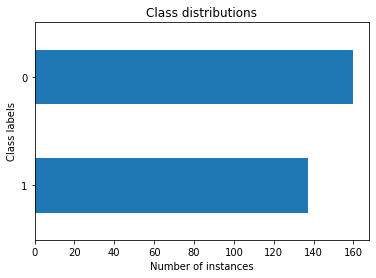

In [5]:
#feature scaling
df_data = sc.normalize_features(df_data)

#plot class distributions
sc.show_class_distributions(df_data)

# Check correlation between features

Let's check how features are correlated with each other

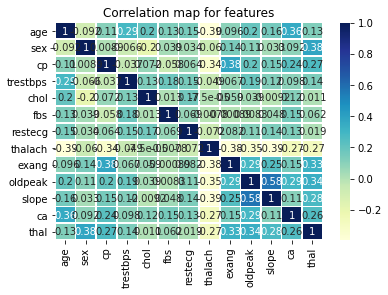

In [6]:
sc.show_feature_correlation(df_data)

# Split data into train and test 

Now, it is time to split our data into train and test sets.
A ratio of 0.2 vs 0.8 is used for test vs train data respectively.

In [7]:
#split the data into train and test
x_train, x_test, y_train, y_test = sc.split_data(df_data, 0.2)

# Start running the classifiers

## Suppor Vector Machine classifier

Now, lets's use Support Vector Machines (SVMs) to predict heart disease.

In [8]:
#initialize SVM classifier
svm = sc.svm 
#fit train data to model
svm.fit(x_train, y_train)
#predict on test data
y_pred = svm.predict(x_test)
#evaluate
acc, report, conf_m = sc.evaluate(y_test, y_pred)

print('Accuracy: ', acc)
print('Detailed Report \n', report)
print('Confusion Matrix \n', conf_m)

Accuracy:  0.85
Detailed Report 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Confusion Matrix 
 [[29  3]
 [ 6 22]]


## Decision Tree Classifier

 Now, let's perform the same experiment using decision tree classifier.

In [9]:
dt = sc.dt
dt.fit(x_train, y_train) 
y_pred = dt.predict(x_test)
acc, report, conf_m = sc.evaluate(y_test, y_pred)

print('Accuracy: ', acc)
print('Detailed Report \n', report)
print('Confusion Matrix \n', conf_m)

Accuracy:  0.7166666666666667
Detailed Report 
               precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.72      0.64      0.68        28

    accuracy                           0.72        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.72      0.72      0.71        60

Confusion Matrix 
 [[25  7]
 [10 18]]


## Naive Bayes classifier

Now, let's perform the same experiment with Naive Bayes classifier.

In [10]:
nb = sc.nb
nb.fit(x_train, y_train) 
y_pred = nb.predict(x_test)
sc.evaluate(y_test, y_pred)

print('Accuracy: ', acc)
print('Detailed Report \n', report)
print('Confusion Matrix \n', conf_m)

Accuracy:  0.7166666666666667
Detailed Report 
               precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.72      0.64      0.68        28

    accuracy                           0.72        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.72      0.72      0.71        60

Confusion Matrix 
 [[25  7]
 [10 18]]


# Perform 10-fold cross validation

Let's choose SVM as a classifier and see
how it is performing on 10-fold cross validation 
as it is a better way to measure classifier success.

In [11]:
#perform 10-fold cross validation 
acc = sc.cross_validation(df_data, 10)
print("Average accuracy of 10-fold cross validation: ", acc)

Average accuracy of 10-fold cross validation:  0.8514942528735633


# Perform feature selection

Now, let's check the importance of each feature by feature selection using a decision tree.

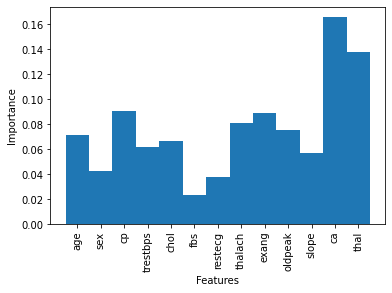

In [12]:
sc.rank_features(x_train, y_train)